In [14]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


import IPython
from PIL import Image
import IPython.display

In [15]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)


In [18]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
    tensor = tensor[0]
    return Image.fromarray(tensor)

In [20]:
import time

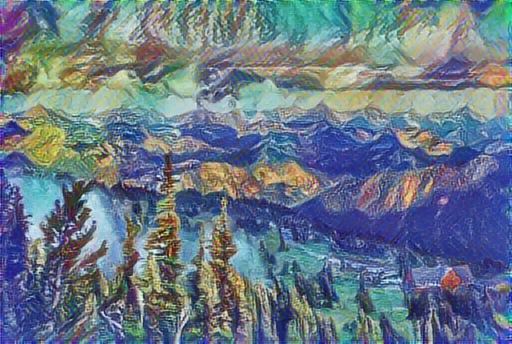

Total time: 10.8539s


In [22]:
start_time = time.time()
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(load_img('./content.jpg')), tf.constant(load_img('./style.jpg')))[0]
IPython.display.display_png(tensor_to_image(stylized_image))
print('Total time: %.4fs' % (time.time() - start_time))